In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_jpake_logs(filename, n):
    df = pd.DataFrame(columns=['participants', '1', '1v', '2', '2v', '3', '4','KC'])
    f = open(filename, "r")
    a = [n]
    for x in f:
        
        if "LATENCY" in x:
            temp = x
            for i in range(len(temp)-1, 0, -1):
                if temp[i] == ":":
                    temp2 = temp[i+1:]
                    a.append(int(temp2))
                    break
            if len(a) == 8:    
                df2 = pd.DataFrame([a], columns=['participants', '1', '1v', '2', '2v', '3', '4','KC'])
                df = df.append(df2)
                a = [n]
    f.close()
    return df

In [4]:
def read_jpake_ec_logs(filename, n):
    df = pd.DataFrame(columns=['participants', '1', '1v', '2', '2v', '3', '4','KC'])
    f = open(filename, "r")
    a = [n]
    for x in f:
        if "EC_LATENCY" in x:
            temp = x
            for i in range(len(temp)-1, 0, -1):
                if temp[i] == ":":
                    temp2 = temp[i+1:]
                    a.append(int(temp2))
                    break
            if len(a) == 8:    

                df2 = pd.DataFrame([a], columns=['participants', '1', '1v', '2', '2v', '3', '4','KC'])
                df = df.append(df2)
                a = [n]
    f.close()
    return df

In [5]:
def read_speke_logs(filename, n):
    df = pd.DataFrame(columns=['participants', '1', '1v', '2', '2v', 'KC'])
    f = open(filename, "r")
    a = [n]
    for x in f:
        if "SPEKE_LATENCY" in x:
            temp = x
            for i in range(len(temp)-1, 0, -1):
                if temp[i] == ":":
                    temp2 = temp[i+1:]
                    a.append(int(temp2))
                    break
            if len(a) == 6:    

                df2 = pd.DataFrame([a], columns=['participants', '1', '1v', '2', '2v', 'KC'])
                df = df.append(df2)
                a = [n]
    f.close()
    return df

In [11]:
def read_participants(filepath, participants, log_type):
    if log_type == "jpake":
        a = read_jpake_logs(filepath+"/logs_2xl_p"+str(participants)+".txt", participants)
        b = read_jpake_logs(filepath+"/logs_3a_p"+str(participants)+".txt", participants)
        c = read_jpake_logs(filepath+"/logs_3_emu_L1_p"+str(participants)+".txt", participants)
        arr = [a, b, c]
        if participants > 3:
            additional_clients = participants - 3
            for i in range(1, additional_clients+1):
                d = read_jpake_logs(filepath+"/logs_3a_emu_C"+str(i)+"_p"+str(participants)+".txt", participants)
                arr.append(d)
        return arr
    elif log_type == "speke":
        a = read_speke_logs(filepath+"/logs_2xl_p"+str(participants)+".txt", participants)
        b = read_speke_logs(filepath+"/logs_3a_p"+str(participants)+".txt", participants)
        c = read_speke_logs(filepath+"/logs_3_emu_L1_p"+str(participants)+".txt", participants)
        arr = [a, b, c]
        if participants > 3:
            additional_clients = participants - 3
            for i in range(1, additional_clients+1):
                d = read_speke_logs(filepath+"/logs_3a_emu_C"+str(i)+"_p"+str(participants)+".txt", participants)
                arr.append(d)
        return arr
    elif log_type == "jpake_ec":
        a = read_jpake_ec_logs(filepath+"/logs_2xl_p"+str(participants)+".txt", participants)
        b = read_jpake_ec_logs(filepath+"/logs_3a_p"+str(participants)+".txt", participants)
        c = read_jpake_ec_logs(filepath+"/logs_3_emu_L1_p"+str(participants)+".txt", participants)
        arr = [a, b, c]
        if participants > 3:
            additional_clients = participants - 3
            for i in range(1, additional_clients+1):
                d = read_jpake_ec_logs(filepath+"/logs_3a_emu_C"+str(i)+"_p"+str(participants)+".txt", participants)
                arr.append(d)
        return arr
    else:
        return []

In [12]:
jpp_p3 = read_participants("jpakeplusLogs", 3, "jpake")
spp_p3 = read_participants("spekeplusLogs", 3, "speke")
jpp_ec_p3 = read_participants("jpakeplusecLogs", 3, "jpake_ec")

jpp_p4 = read_participants("jpakeplusLogs", 4, "jpake")
spp_p4 = read_participants("spekeplusLogs", 4, "speke")
jpp_ec_p4 = read_participants("jpakeplusecLogs", 4, "jpake_ec")

jpp_p5 = read_participants("jpakeplusLogs", 5, "jpake")
spp_p5 = read_participants("spekeplusLogs", 5, "speke")
jpp_ec_p5 = read_participants("jpakeplusecLogs", 5, "jpake_ec")

jpp_p6 = read_participants("jpakeplusLogs", 6, "jpake")
spp_p6 = read_participants("spekeplusLogs", 6, "speke")
jpp_ec_p6 = read_participants("jpakeplusecLogs", 6, "jpake_ec")


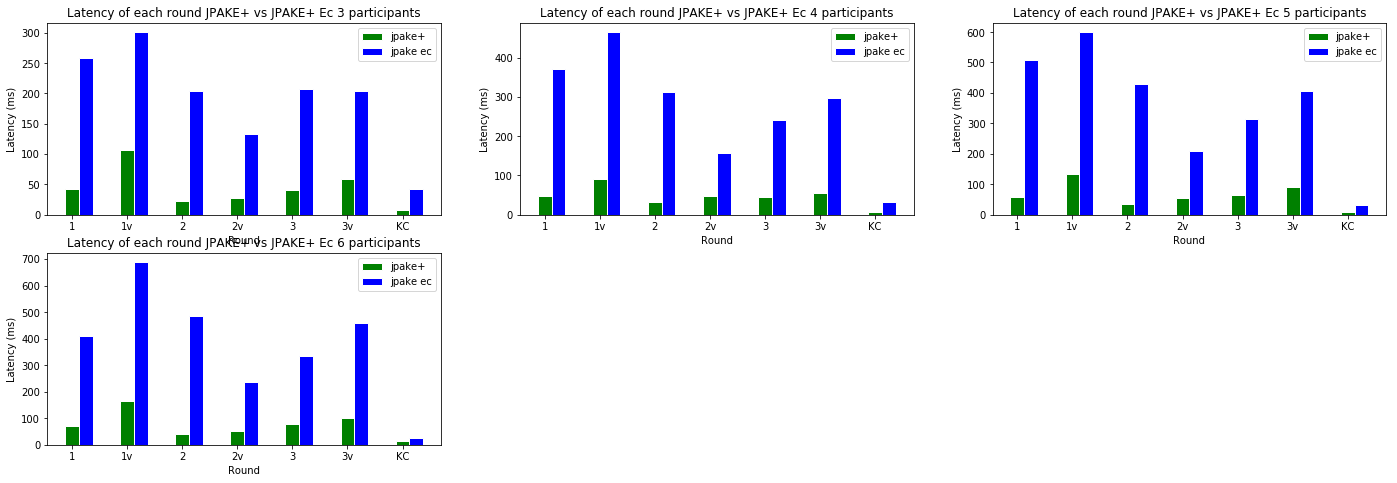

In [15]:
jpake_plus_3 = 0
for i in jpp_p3:
    jpake_plus_3 = jpake_plus_3 + i.mean()
jpake_plus_3 = jpake_plus_3/3
jpake_plus_3 = list(jpake_plus_3)

jpake_plus_ec_3 = 0
for i in jpp_ec_p3:
    jpake_plus_ec_3 = jpake_plus_ec_3 + i.mean()
jpake_plus_ec_3 = jpake_plus_ec_3/3
jpake_plus_ec_3 = list(jpake_plus_ec_3)

jpake_plus_4 = 0
for i in jpp_p4:
    jpake_plus_4 = jpake_plus_4 + i.mean()
jpake_plus_4 = jpake_plus_4/4
jpake_plus_4 = list(jpake_plus_4)

jpake_plus_ec_4 = 0
for i in jpp_ec_p4:
    jpake_plus_ec_4 = jpake_plus_ec_4 + i.mean()
jpake_plus_ec_4 = jpake_plus_ec_4/4
jpake_plus_ec_4 = list(jpake_plus_ec_4)


jpake_plus_5 = 0
for i in jpp_p5:
    if not i.empty:
        jpake_plus_5 = jpake_plus_5 + i.mean()

jpake_plus_5 = jpake_plus_5/5
jpake_plus_5 = list(jpake_plus_5)

jpake_plus_ec_5 = 0
for i in jpp_ec_p5:
    jpake_plus_ec_5 = jpake_plus_ec_5 + i.mean()
jpake_plus_ec_5 = jpake_plus_ec_5/5
jpake_plus_ec_5 = list(jpake_plus_ec_5)



jpake_plus_6 = 0
for i in jpp_p6:
    jpake_plus_6 = jpake_plus_6 + i.mean()
jpake_plus_6 = jpake_plus_6/6
jpake_plus_6 = list(jpake_plus_6)

jpake_plus_ec_6 = 0
for i in jpp_ec_p6:
    if not i.empty:
        jpake_plus_ec_6 = jpake_plus_ec_6 + i.mean()
jpake_plus_ec_6 = jpake_plus_ec_6/6
jpake_plus_ec_6 = list(jpake_plus_ec_6)




barWidth = 0.25
labels = jpp_ec_p3[0].keys()
plt.figure(figsize=[24,12])

x_pos = np.arange(1, 8).tolist()
x_pos_2 = [i+barWidth+1 for i,_ in enumerate(x_pos)]


plt.subplot(3,3,1)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["1", "1v", "2", "2v", "3", "3v", "KC"])
plt.bar(x_pos, jpake_plus_3[1:], color='green', width=barWidth, edgecolor='white', label='jpake+')
plt.bar(x_pos_2, jpake_plus_ec_3[1:], color='blue', width=barWidth, edgecolor='white', label='jpake ec')
plt.xlabel("Round")
plt.ylabel("Latency (ms)")
plt.title("Latency of each round JPAKE+ vs JPAKE+ Ec 3 participants")
plt.legend()

plt.subplot(3,3,2)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["1", "1v", "2", "2v", "3", "3v", "KC"])
plt.bar(x_pos, jpake_plus_4[1:], color='green', width=barWidth, edgecolor='white', label='jpake+')
plt.bar(x_pos_2,jpake_plus_ec_4[1:], color='blue', width=barWidth, edgecolor='white', label='jpake ec')
plt.xlabel("Round")
plt.ylabel("Latency (ms)")
plt.title("Latency of each round JPAKE+ vs JPAKE+ Ec 4 participants")
plt.legend()

plt.subplot(3,3,3)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["1", "1v", "2", "2v", "3", "3v", "KC"])
plt.bar(x_pos, jpake_plus_5[1:], color='green', width=barWidth, edgecolor='white', label='jpake+')
plt.bar(x_pos_2,jpake_plus_ec_5[1:], color='blue', width=barWidth, edgecolor='white', label='jpake ec')
plt.xlabel("Round")
plt.ylabel("Latency (ms)")
plt.title("Latency of each round JPAKE+ vs JPAKE+ Ec 5 participants")
plt.legend()

plt.subplot(3,3,4)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["1", "1v", "2", "2v", "3", "3v", "KC"])
plt.bar(x_pos, jpake_plus_6[1:], color='green', width=barWidth, edgecolor='white', label='jpake+')
plt.bar(x_pos_2,jpake_plus_ec_6[1:], color='blue', width=barWidth, edgecolor='white', label='jpake ec')
plt.xlabel("Round")
plt.ylabel("Latency (ms)")
plt.title("Latency of each round JPAKE+ vs JPAKE+ Ec 6 participants")
plt.legend()



plt.show()


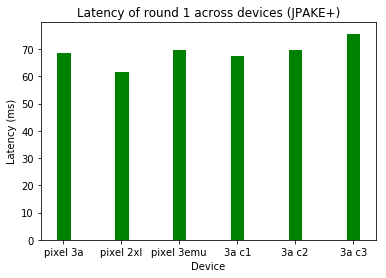

In [20]:
plt.xticks(x_pos, ["pixel 3a", "pixel 2xl", "pixel 3emu", "3a c1", "3a c2", "3a c3"])

a = []
for i in jpp_p6:
    a.append(i["1"].mean())
x_pos = [i for i in range(6)]

plt.bar(x_pos, a, color='green', width=barWidth, edgecolor='white')


plt.xlabel("Device")
plt.ylabel("Latency (ms)")
plt.title("Latency of round 1 across devices (JPAKE+)")
plt.show()

In [23]:
labels = jpp_ec_p3[0].keys()


x_pos = [i for i, _ in enumerate(labels)]
x_pos2 = [i + barWidth for i, _ in enumerate(labels)]
x_pos3 = [i + barWidth for i in x_pos2]

j3, s3, je3 = 0, 0, 0
for i in range(len(jpp_p3)):
    j3 = j3 + jpp_p3[i].mean()
    s3 = s3 + spp_p3[i].mean()
    je3 = je3 + jpp_ec_p3[i].mean()
j3 = j3 / len(jpp_p3)
s3 = s3 / len(spp_p3)
je3 = je3 / len(jpp_ec_p3)

j4, s4, je4 = 0, 0, 0
for i in range(len(jpp_p4)):
    j4 = j4 + jpp_p4[i].mean()
    s4 = s4 + spp_p4[i].mean()
    je4 = je4 + jpp_ec_p4[i].mean()
j4 = j4 / len(jpp_p4)
s4 = s4 / len(spp_p4)
je4 = je4 / len(jpp_ec_p4)

j5, s5, je5 = 0, 0, 0
for i in range(len(jpp_p5)):
    if not jpp_p5[i].empty:
        j5 = j5 + jpp_p5[i].mean()
    s5 = s5 + spp_p5[i].mean()
    je5 = je5 + jpp_ec_p5[i].mean()
j5 = j5 / len(jpp_p5)
s5 = s5 / len(spp_p5)
je5 = je5 / len(jpp_ec_p5)

j6, s6, je6 = 0, 0, 0
for i in range(len(jpp_p6)):
    j6 = j6 + jpp_p6[i].mean()
    s6 = s6 + spp_p6[i].mean()
    temp = jpp_ec_p6[i].mean()
    if not temp.isnull().values.any():
        je6 = je6 + temp
    
j6 = j6 / len(jpp_p6)
s6 = s6 / len(spp_p6)
je6 = je6 / len(jpp_ec_p6)

In [ ]:
round_1 = [j3['1'], j4['1'], j5['1'], j6['1']]
round_1v = [j3['1v'], j4['1v'], j5['1v'], j6['1v']]
round_2 = [j3['2'], j4['2'], j5['2'], j6['2']]
round_2v = [j3['2v'], j4['2v'], j5['2v'], j6['2v']]
round_3 = [j3['3'], j4['3'], j5['3'], j6['3']]
round_3v = [j3['4'], j4['4'], j5['4'], j6['4']]
round_kc = [j3['KC'], j4['KC'], j5['KC'], j6['KC']]


plt.figure(figsize=[24,6])
plt.subplot(1,3,1)
x = np.arange(0,4).tolist()
plt.xticks(x, np.arange(3,7).tolist())
plt.bar(x, round_1, color=(0.356, 0.745, 0.760, 1), width=barWidth, edgecolor='white', label='r1 computation latency')
plt.bar(x, round_1v, color=(0.694, 0.917, 0.929,1), bottom=round_1, width=barWidth, edgecolor='white', label='r1v computation latency')
plt.bar(x, round_2, color=(0.772, 0.403, 0.470, 1), bottom=np.array(round_1v)+np.array(round_1), width=barWidth, edgecolor='white', label='r2 computation latency')
plt.bar(x, round_2v, color=(0.925, 0.654, 0.701, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2), width=barWidth, edgecolor='white', label='r2v computation latency')
plt.bar(x, round_3, color=(0.709, 0.356, 0.760, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v), width=barWidth, edgecolor='white', label='r3 computation latency')
plt.bar(x, round_3v, color=(0.905, 0.705, 0.933, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v)+np.array(round_3), width=barWidth, edgecolor='white', label='r3v computation latency')
plt.bar(x, round_kc, color=(0.705, 0.933, 0.764, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v)+np.array(round_3)+np.array(round_3v), width=barWidth, edgecolor='white', label='kc latency')
plt.ylim(0, 3000)
plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.title("JPAKE+ Latency with n participants")



plt.legend()



plt.subplot(1,3,2)
round_1 = [s3['1'], s4['1'], s5['1'], s6['1']]
round_1v = [s3['1v'], s4['1v'], j5['1v'], s6['1v']]
round_2 = [s3['2'], s4['2'], s5['2'], j6['2']]
round_2v = [s3['2v'], s4['2v'], s5['2v'], s6['2v']]
round_kc = [s3['KC'], s4['KC'], s5['KC'], s6['KC']]
x = np.arange(0,4).tolist()
plt.xticks(x, np.arange(3,7).tolist())
plt.bar(x, round_1, color=(0.356, 0.745, 0.760, 1), width=barWidth, edgecolor='white', label='r1 computation latency')
plt.bar(x, round_1v, color=(0.694, 0.917, 0.929,1), bottom=round_1, width=barWidth, edgecolor='white', label='r1v computation latency')
plt.bar(x, round_2, color=(0.772, 0.403, 0.470, 1), bottom=np.array(round_1v)+np.array(round_1), width=barWidth, edgecolor='white', label='r2 computation latency')
plt.bar(x, round_2v, color=(0.925, 0.654, 0.701, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2), width=barWidth, edgecolor='white', label='r2v computation latency')
plt.bar(x, round_kc, color=(0.705, 0.933, 0.764, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v), width=barWidth, edgecolor='white', label='kc latency')
plt.ylim(0, 3000)
plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.title("SPEKE+ Latency with n participants")



plt.legend()

round_1 = [je3['1'], je4['1'], je5['1'], je6['1']]
round_1v = [je3['1v'], je4['1v'], je5['1v'], je6['1v']]
round_2 = [je3['2'], je4['2'], je5['2'], je6['2']]
round_2v = [je3['2v'], je4['2v'], je5['2v'], je6['2v']]
round_3 = [je3['3'], je4['3'], je5['3'], je6['3']]
round_3v = [je3['4'], je4['4'], je5['4'], je6['4']]
round_kc = [je3['KC'], je4['KC'], je5['KC'], je6['KC']]
print(round_1v)
print(round_2v)
print(round_3v)
plt.legend()


plt.show()
plt.figure(figsize=[24, 6])
plt.subplot(1,2,1)
x = np.arange(0,4).tolist()
plt.xticks(x, np.arange(3,7).tolist())
plt.bar(x, round_1, color=(0.356, 0.745, 0.760, 1), width=barWidth, edgecolor='white', label='r1 computation latency')
plt.bar(x, round_1v, color=(0.694, 0.917, 0.929,1), bottom=round_1, width=barWidth, edgecolor='white', label='r1v computation latency')
plt.bar(x, round_2, color=(0.772, 0.403, 0.470, 1), bottom=np.array(round_1v)+np.array(round_1), width=barWidth, edgecolor='white', label='r2 computation latency')
plt.bar(x, round_2v, color=(0.925, 0.654, 0.701, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2), width=barWidth, edgecolor='white', label='r2v computation latency')
plt.bar(x, round_3, color=(0.709, 0.356, 0.760, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v), width=barWidth, edgecolor='white', label='r3 computation latency')
plt.bar(x, round_3v, color=(0.905, 0.705, 0.933, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v)+np.array(round_3), width=barWidth, edgecolor='white', label='r3v computation latency')
plt.bar(x, round_kc, color=(0.705, 0.933, 0.764, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v)+np.array(round_3)+np.array(round_3v), width=barWidth, edgecolor='white', label='kc latency')
plt.ylim(0, 3000)
plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.title("JPAKE+ EC Latency with n participants (Java)")


round_1 = [66.4, 91.99, 117.66, 175.51]
round_1v = [79.91, 121, 158.64, 209.04]
round_2 = [27.04, 40.23, 53.63, 74.79]
round_2v = [26.18, 39.38, 52.63, 68.44]
round_3 = [52.38, 65.5, 78.87, 97.49]
round_3v = [53.06, 79.23, 121.45, 145.09]
round_kc = [7.41, 7.9, 11.83, 14.06]
plt.subplot(1,2,2)
x = np.arange(0,4).tolist()
plt.xticks(x, np.arange(3,7).tolist())
plt.bar(x, round_1, color=(0.356, 0.745, 0.760, 1), width=barWidth, edgecolor='white', label='r1 computation latency')
plt.bar(x, round_1v, color=(0.694, 0.917, 0.929,1), bottom=round_1, width=barWidth, edgecolor='white', label='r1v computation latency')
plt.bar(x, round_2, color=(0.772, 0.403, 0.470, 1), bottom=np.array(round_1v)+np.array(round_1), width=barWidth, edgecolor='white', label='r2 computation latency')
plt.bar(x, round_2v, color=(0.925, 0.654, 0.701, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2), width=barWidth, edgecolor='white', label='r2v computation latency')
plt.bar(x, round_3, color=(0.709, 0.356, 0.760, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v), width=barWidth, edgecolor='white', label='r3 computation latency')
plt.bar(x, round_3v, color=(0.905, 0.705, 0.933, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v)+np.array(round_3), width=barWidth, edgecolor='white', label='r3v computation latency')
plt.bar(x, round_kc, color=(0.705, 0.933, 0.764, 1), bottom=np.array(round_1v)+np.array(round_1) + np.array(round_2)+np.array(round_2v)+np.array(round_3)+np.array(round_3v), width=barWidth, edgecolor='white', label='kc latency')
plt.ylim(0, 3000)
plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.title("JPAKE+ EC Latency with n participants (Python)")


plt.legend()

plt.show()


In [10]:
jpp_p3[0].mean()

participants     3.000000
1               36.000000
1v              70.666667
2               29.666667
2v              28.000000
3               25.000000
4               56.000000
KC               9.333333
dtype: float64

In [11]:
spp_p3[0].mean()

participants      3.000000
1                56.333333
1v               96.666667
2                94.666667
2v              123.666667
KC               51.666667
dtype: float64

In [12]:
JPAKE = 2
SPEKE = 26
EC = 60
def theoretical_speke(t, n): 
    s = []
    s.append(t*3)
    s.append(t * ((n-1) * 2.215))
    s.append(t * (3+(n-1)*1))
    s.append(t * ((n-1) * 3.25))
    s.append(t)
    return s
def theoretical_jpake(t, n):
    j = []
    j.append(t * (2 + (n-1) * 4))
    j.append(t * (n-1) * 9)
    j.append(t * (n-1) * 2)
    j.append(t * (n-1) * 4)
    j.append(t * (5 + (n-1) * 2))
    j.append(t * (n-1) * 5)
    j.append(t)
    return j


20


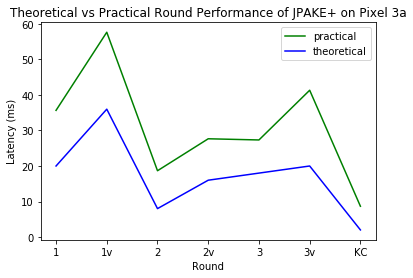

In [13]:
y = theoretical_jpake(JPAKE, 3)

pixel_3a = jpp_p3[1].mean()
print(y[0])

x_pos = np.arange(1,8).tolist()
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["1", "1v", "2", "2v", "3", "3v", "KC"])
plt.plot(x_pos, pixel_3a[1:], color='green',  label='practical')
plt.plot(x_pos, y, color='blue', label='theoretical')
plt.xlabel("Round")
plt.ylabel("Latency (ms)")
plt.title("Theoretical vs Practical Round Performance of JPAKE+ on Pixel 3a")
plt.legend()

In [1]:
p_3a = [jpp_p3[1].mean(), jpp_p4[1].mean(), jpp_p5[1].mean(), jpp_p6[1].mean()]
p_3a_s = [spp_p3[1].mean(), spp_p4[1].mean(), spp_p5[1].mean(), spp_p6[1].mean()]
theoretical = [theoretical_jpake(JPAKE, 3), theoretical_jpake(JPAKE, 4),
               theoretical_jpake(JPAKE, 5), theoretical_jpake(JPAKE, 6)]
theoretical_s = [theoretical_speke(SPEKE,3), theoretical_speke(SPEKE,4),
               theoretical_speke(SPEKE,5), theoretical_speke(SPEKE,6)]

x_pos = np.arange(0,4).tolist()

p_3a_1 = [p_3a[0]["1"], p_3a[1]["1"], p_3a[2]["1"], p_3a[3]["1"]]
t_1 = [theoretical[0][0], theoretical[1][0], theoretical[2][0], theoretical[3][0]]

p_3a_1v = [p_3a[0]["1v"], p_3a[1]["1v"], p_3a[2]["1v"], p_3a[3]["1v"]]
t_1v = [theoretical[0][1], theoretical[1][1], theoretical[2][1], theoretical[3][1]]

p_3a_2 = [p_3a[0]["2"], p_3a[1]["2"], p_3a[2]["2"], p_3a[3]["2"]]
t_2 = [theoretical[0][2], theoretical[1][2], theoretical[2][2], theoretical[3][2]]

p_3a_2v = [p_3a[0]["2v"], p_3a[1]["2v"], p_3a[2]["2v"], p_3a[3]["2v"]]
t_2v = [theoretical[0][3], theoretical[1][3], theoretical[2][3], theoretical[3][3]]

p_3a_3 = [p_3a[0]["3"], p_3a[1]["3"], p_3a[2]["3"], p_3a[3]["3"]]
t_3 = [theoretical[0][4], theoretical[1][4], theoretical[2][4], theoretical[3][4]]

p_3a_3v = [p_3a[0]["4"], p_3a[1]["4"], p_3a[2]["4"], p_3a[3]["4"]]
t_3v = [theoretical[0][5], theoretical[1][5], theoretical[2][5], theoretical[3][5]]

p_3a_kc = [p_3a[0]["KC"], p_3a[1]["KC"], p_3a[2]["KC"], p_3a[3]["KC"]]
t_kc = [theoretical[0][6], theoretical[1][6], theoretical[2][6], theoretical[3][6]]



p_3a_1s = [p_3a_s[0]["1"], p_3a_s[1]["1"], p_3a_s[2]["1"], p_3a_s[3]["1"]]
t_1s = [theoretical_s[0][0], theoretical_s[1][0], theoretical_s[2][0], theoretical_s[3][0]]

p_3a_1vs = [p_3a_s[0]["1v"], p_3a_s[1]["1v"], p_3a_s[2]["1v"], p_3a_s[3]["1v"]]
t_1vs = [theoretical_s[0][1], theoretical_s[1][1], theoretical_s[2][1], theoretical_s[3][1]]

p_3a_2s = [p_3a_s[0]["2"], p_3a_s[1]["2"], p_3a_s[2]["2"], p_3a_s[3]["2"]]
t_2s = [theoretical_s[0][2], theoretical_s[1][2], theoretical_s[2][2], theoretical_s[3][2]]

p_3a_2vs = [p_3a_s[0]["2v"], p_3a_s[1]["2v"], p_3a_s[2]["2v"], p_3a_s[3]["2v"]]
t_2vs = [theoretical_s[0][3], theoretical_s[1][3], theoretical_s[2][3], theoretical_s[3][3]]

p_3a_kcs = [p_3a_s[0]["KC"], p_3a_s[1]["KC"], p_3a_s[2]["KC"], p_3a_s[3]["KC"]]
t_kcs = [theoretical_s[0][4], theoretical_s[1][4], theoretical_s[2][4], theoretical_s[3][4]]


plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.xticks([0, 1, 2, 3], ["3", "4", "5", "6"])
plt.plot(x_pos, p_3a_1, color='green',  label='round 1')
plt.scatter(x_pos, t_1, color='green')

plt.plot(x_pos, p_3a_1v, color='blue',  label='round 1v')
plt.scatter(x_pos, t_1v, color='blue')

plt.plot(x_pos, p_3a_2, color='red',  label='2')
plt.scatter(x_pos, t_2, color='red')

plt.plot(x_pos, p_3a_2v, color='orange',  label='round 2v')
plt.scatter(x_pos, t_2v, color='orange')

plt.plot(x_pos, p_3a_3, color='purple',  label='round 3')
plt.scatter(x_pos, t_3, color='purple')

plt.plot(x_pos, p_3a_3v, color='yellow',  label='round 3v')
plt.scatter(x_pos, t_3v, color='yellow')

plt.plot(x_pos, p_3a_kc, color='black',  label='round kc')
plt.scatter(x_pos, t_kc, color='black')


plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.title("Theoretical vs Practical Round Performance of JPAKE+ on Pixel 3a")

plt.legend()


plt.subplot(1,2,2)
plt.xticks([0, 1, 2, 3], ["3", "4", "5", "6"])
plt.plot(x_pos, p_3a_1s, color='green',  label='round 1')
plt.scatter(x_pos, t_1s, color='green')

plt.plot(x_pos, p_3a_1vs, color='blue',  label='round 1v')
plt.scatter(x_pos, t_1vs, color='blue')

plt.plot(x_pos, p_3a_2s, color='red',  label='round 2')
plt.scatter(x_pos, t_2s, color='red')

plt.plot(x_pos, p_3a_2vs, color='orange',  label='round 2v')
plt.scatter(x_pos, t_2vs, color='orange')

plt.plot(x_pos, p_3a_kcs, color='black',  label='round kc')
plt.scatter(x_pos, t_kcs, color='black')

plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.title("Theoretical vs Practical Round Performance of SPEKE+ on Pixel 3a")
plt.ylim(0, 400)
plt.legend()
plt.show()

NameError: name 'jpp_p3' is not defined

4


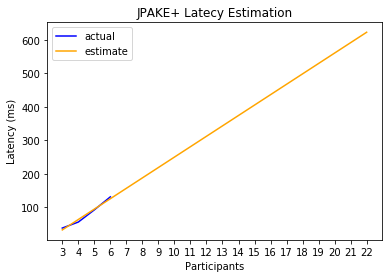

[31.02314815]
[38.611111111111114, 56.51041666666667, 92.86111111111111, 131.68055555555554]


In [45]:
def extrapolate(m, x, c):
    y = m*x + c
    return y
jpake_plus_3 = 0
for i in jpp_p3:
    jpake_plus_3 = jpake_plus_3 + i.mean()
jpake_plus_3 = jpake_plus_3/3
jpake_plus_3 = list(jpake_plus_3)

jpake_plus_ec_3 = 0
for i in jpp_ec_p3:
    jpake_plus_ec_3 = jpake_plus_ec_3 + i.mean()
jpake_plus_ec_3 = jpake_plus_ec_3/3
jpake_plus_ec_3 = list(jpake_plus_ec_3)

jpake_plus_4 = 0
print(len(jpp_p4))
for i in jpp_p4:
    jpake_plus_4 = jpake_plus_4 + i.mean()
jpake_plus_4 = jpake_plus_4/3
jpake_plus_4 = list(jpake_plus_4)

jpake_plus_ec_4 = 0
for i in jpp_ec_p4:
    jpake_plus_ec_4 = jpake_plus_ec_4 + i.mean()
jpake_plus_ec_4 = jpake_plus_ec_4/3
jpake_plus_ec_4 = list(jpake_plus_ec_4)


jpake_plus_5 = 0
for i in jpp_p5:
    if not i.empty:
        jpake_plus_5 = jpake_plus_5 + i.mean()

jpake_plus_5 = jpake_plus_5/3
jpake_plus_5 = list(jpake_plus_5)

jpake_plus_ec_5 = 0
for i in jpp_ec_p5:
    jpake_plus_ec_5 = jpake_plus_ec_5 + i.mean()
jpake_plus_ec_5 = jpake_plus_ec_5/3
jpake_plus_ec_5 = list(jpake_plus_ec_5)



jpake_plus_6 = 0
for i in jpp_p6:
    jpake_plus_6 = jpake_plus_6 + i.mean()
jpake_plus_6 = jpake_plus_6/3
jpake_plus_6 = list(jpake_plus_6)

jpake_plus_ec_6 = 0
for i in jpp_ec_p6:
    jpake_plus_ec_6 = jpake_plus_ec_6 + i.mean()
jpake_plus_ec_6 = jpake_plus_ec_6/6
jpake_plus_ec_6 = list(jpake_plus_ec_6)

jpake = [np.mean(jpake_plus_3), np.mean(jpake_plus_4)+2, np.mean(jpake_plus_5), np.mean(jpake_plus_6)]

m = (jpake[3]-[jpake[0]])/(6-3)
estimate = []

for i in range(3, 23):
    estimate.append(extrapolate(m, i, -60))

x_pos = np.arange(0,20).tolist()
x = np.arange(3,23).tolist()
plt.xticks(x_pos,x)
plt.plot([0, 1, 2, 3], jpake, color="blue", label='actual')
plt.plot(x_pos, estimate, color="orange",label='estimate')
plt.title("JPAKE+ Latecy Estimation")
plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.legend()
plt.show()
print(m)
print(jpake)

  participants   1   1v    2   2v  KC
0            4  57  123  137  161  54
0            4  54  120  133  166  55
0            4  57  123   86  165  53


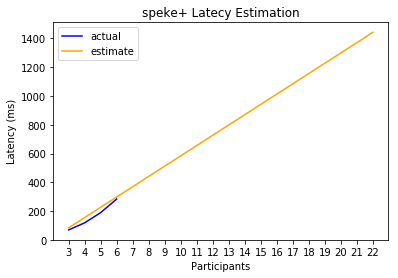

[70.07407407407408, 119.53703703703702, 190.35185185185185, 284.50000000000006]
[71.47530864]


In [46]:
def extrapolate(m, x, c):
    y = m*x + c
    return y
speke_plus_3 = 0
for i in spp_p3:
    speke_plus_3 = speke_plus_3 + i.mean()
speke_plus_3 = speke_plus_3/3
speke_plus_3 = list(speke_plus_3)

speke_plus_4 = 0
print(spp_p4[0])
for i in spp_p4:
    if not i.empty:
        speke_plus_4 = speke_plus_4 + i.mean()
speke_plus_4 = speke_plus_4/3
speke_plus_4 = list(speke_plus_4)

speke_plus_5 = 0
for i in spp_p5:
    if not i.empty:
        speke_plus_5 = speke_plus_5 + i.mean()

speke_plus_5 = speke_plus_5/3
speke_plus_5 = list(speke_plus_5)

speke_plus_6 = 0
for i in spp_p6:
    speke_plus_6 = speke_plus_6 + i.mean()
speke_plus_6 = speke_plus_6/3
speke_plus_6 = list(speke_plus_6)


speke = [np.mean(speke_plus_3), np.mean(speke_plus_4)+2, np.mean(speke_plus_5), np.mean(speke_plus_6)]
m = (speke[3]-[speke[0]])/(6-3)
estimate = []
for i in range(3, 23):
    estimate.append(extrapolate(m, i, -130))

x_pos = np.arange(0,20).tolist()
x = np.arange(3,23).tolist()
plt.xticks(x_pos,x)
plt.plot([0, 1, 2, 3], speke, color="blue", label='actual')
plt.plot(x_pos, estimate, color="orange",label='estimate')
plt.title("speke+ Latecy Estimation")
plt.xlabel("Participants")
plt.ylabel("Latency (ms)")
plt.legend()
plt.show()
print(speke)
print(m)

64
627


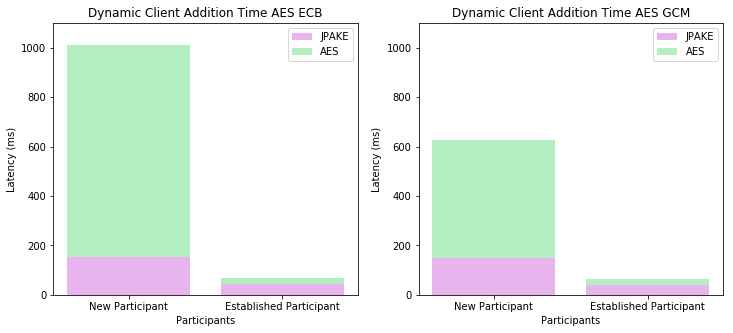

In [16]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.bar(["New Participant", "Established Participant"], [155, 44], color=(0.905, 0.705, 0.933, 1), label='JPAKE')
plt.bar(["New Participant", "Established Participant"], [855, 23], bottom=[155,44], color=(0.705, 0.933, 0.764, 1),label='AES')
plt.legend()
plt.title("Dynamic Client Addition Time AES ECB")
plt.ylabel("Latency (ms)")
plt.xlabel("Participants")
plt.ylim(0, 1100)
plt.subplot(1,2,2)
plt.bar(["New Participant", "Established Participant"], [148, 41], color=(0.905, 0.705, 0.933, 1), label='JPAKE')
plt.bar(["New Participant", "Established Participant"], [479, 23], bottom=[148,41], color=(0.705, 0.933, 0.764, 1),label='AES')
plt.legend()
plt.title("Dynamic Client Addition Time AES GCM")
plt.ylabel("Latency (ms)")
plt.xlabel("Participants")
plt.ylim(0, 1100)
plt.show
print(41+23)
print(148+479)

<function matplotlib.pyplot.show(*args, **kw)>

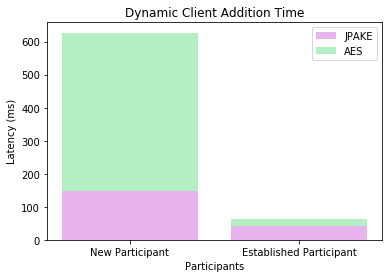

In [17]:
plt.bar(["New Participant", "Established Participant"], [148, 41], color=(0.905, 0.705, 0.933, 1), label='JPAKE')
plt.bar(["New Participant", "Established Participant"], [479, 23], bottom=[148,41], color=(0.705, 0.933, 0.764, 1),label='AES')
plt.legend()
plt.title("Dynamic Client Addition Time")
plt.ylabel("Latency (ms)")
plt.xlabel("Participants")
plt.show